In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
# import akshare as ak

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# 数据读入

In [2]:
df_main = pd.read_excel("/Users/improvise/Desktop/Guaranteed Graduates/Thesis/ESG/Playground/05_DataIntegration2/df_PDF_main12.xlsx")

In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PDF_name              1038 non-null   object 
 1   Corp_code             1038 non-null   int64  
 2   Corp_name             1038 non-null   object 
 3   Corp_market           1038 non-null   object 
 4   Pub_year              1038 non-null   int64  
 5   Pub_type              1038 non-null   object 
 6   PDF_pages             1038 non-null   int64  
 7   img_num               1038 non-null   int64  
 8   img_size_avg          1038 non-null   float64
 9   img_num_pages_ratio   1038 non-null   float64
 10  img_size_pages_ratio  1038 non-null   float64
 11  dist_diag_ratio       953 non-null    float64
 12  Corp_industry_code    1032 non-null   object 
 13  Mono_idst             1038 non-null   bool   
 14  Poll_idst             1038 non-null   bool   
 15  ROA                  

# 变量筛选

In [5]:
 df_main.columns

Index(['PDF_name', 'Corp_code', 'Corp_name', 'Corp_market', 'Pub_year',
       'Pub_type', 'PDF_pages', 'img_num', 'img_size_avg',
       'img_num_pages_ratio', 'img_size_pages_ratio', 'dist_diag_ratio',
       'Corp_industry_code', 'Mono_idst', 'Poll_idst', 'ROA', 'ROE',
       'OperateDuration', 'BloombergESG', 'BloombergE', 'BloombergS',
       'BloombergG', 'ShortName', 'STPT', '金融业', '资不抵债', '沪深上市', '北京上市',
       'IndustryName', 'Industry1', 'Industry2', 'PROVINCECODE', 'PROVINCE',
       'CITYCODE', 'CITY', 'East', 'West', 'Mid', 'HighTech_1', 'HighTech_2',
       'Pollute_1', 'Pollute_2', 'Pollute_3', 'EndDate', 'Patents',
       'Invention', 'AnaAttention', 'ReportAttention', 'FTSE_ESG_score',
       'word_simi_avg', 'Wind_ESG', 'Top3ManageSumSalary', 'cash_ratio'],
      dtype='object')

In [6]:
df_main_selected = df_main[['Corp_code', 'Corp_name', 'Pub_year',
       'img_num_pages_ratio', 'img_size_pages_ratio', 
       'dist_diag_ratio', 'word_simi_avg', 'Wind_ESG', 
       'Corp_industry_code', 'Mono_idst', 'Poll_idst', 'ROA', 'ROE',  'cash_ratio','OperateDuration', 
       'PROVINCE','CITY', 'East', 'West', 'Mid',  
       'Patents', 'Invention',
       'AnaAttention', 'ReportAttention', 'Top3ManageSumSalary']]

# 识别异常值 

In [14]:
df_variables = df_main_selected[['img_num_pages_ratio', 'img_size_pages_ratio', 
       'dist_diag_ratio', 'word_simi_avg', 'Wind_ESG', 
       'Corp_industry_code', 'Mono_idst', 'Poll_idst', 'ROA', 'ROE', 'cash_ratio','OperateDuration', 
       'Patents', 'Invention',
       'AnaAttention', 'ReportAttention', 'Top3ManageSumSalary']]

In [16]:
df_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   img_num_pages_ratio   1038 non-null   float64
 1   img_size_pages_ratio  1038 non-null   float64
 2   dist_diag_ratio       953 non-null    float64
 3   word_simi_avg         1038 non-null   float64
 4   Wind_ESG              1010 non-null   float64
 5   Corp_industry_code    1032 non-null   object 
 6   Mono_idst             1038 non-null   bool   
 7   Poll_idst             1038 non-null   bool   
 8   ROA                   1025 non-null   float64
 9   ROE                   1025 non-null   float64
 10  cash_ratio            1032 non-null   float64
 11  OperateDuration       1032 non-null   float64
 12  Patents               245 non-null    float64
 13  Invention             207 non-null    float64
 14  AnaAttention          707 non-null    float64
 15  ReportAttention      

In [18]:
df_variables.describe()

,img_num_pages_ratio,img_size_pages_ratio,dist_diag_ratio,word_simi_avg,Wind_ESG,ROA,ROE,cash_ratio,OperateDuration,Patents,Invention,AnaAttention,ReportAttention,Top3ManageSumSalary
count,1038.000000,1038.000000,953.000000,1038.000000,1010.000000,1025.000000,1025.000000,1032.000000,1032.000000,245.000000,207.000000,707.000000,707.000000,1.027000e+03
mean,2.203934,8957.817411,0.299208,-0.076595,6.676822,0.045529,0.038570,0.160698,22.679264,1960.775510,510.560386,15.397454,35.366337,6.329373e+06
std,3.906663,49048.647169,0.051403,0.307577,1.001766,0.061886,1.387272,0.120994,6.330598,6436.647405,1675.799005,14.393859,39.736992,7.824081e+06
min,0.018868,30.970266,0.030170,-1.000000,3.720000,-0.308475,-44.125540,0.003587,6.000000,2.000000,2.000000,1.000000,1.000000,4.936000e+05
25%,1.000000,1268.328732,0.270773,-0.008104,5.900000,0.013607,0.042475,0.072739,18.000000,122.000000,32.000000,4.000000,6.000000,2.741350e+06
50%,1.640513,2477.874906,0.298591,0.028601,6.585000,0.037127,0.083992,0.129416,23.000000,306.000000,75.000000,11.000000,22.000000,4.094300e+06
75%,2.476959,4809.520199,0.324192,0.048662,7.410000,0.074130,0.132363,0.215172,27.000000,979.000000,232.500000,23.000000,50.500000,7.218554e+06
max,79.608696,960641.500000,0.633052,0.500000,9.610000,0.365845,0.497877,0.782183,44.000000,53580.000000,12141.000000,70.000000,295.000000,1.175087e+08


## IQR法

In [35]:
def IQR(df, column, quantile_up=0.1, quantile_down = 0.9, rate=1.5):
    Q1 = df[column].quantile(quantile_up)
    Q3 = df[column].quantile(quantile_down)
    
    lower = Q1 - rate * (Q3-Q1)
    upper = Q3 + rate * (Q3-Q1)

    outliner_equation = (df[column] < lower) | (df[column] > upper)
    outliners = df[outliner_equation]
    # print(outliners)

    return df[~(outliner_equation)][['Corp_code',  'Pub_year', column]]

In [38]:
df_variables.columns

Index(['img_num_pages_ratio', 'img_size_pages_ratio', 'dist_diag_ratio',
       'word_simi_avg', 'Wind_ESG', 'Corp_industry_code', 'Mono_idst',
       'Poll_idst', 'ROA', 'ROE', 'cash_ratio', 'OperateDuration', 'Patents',
       'Invention', 'AnaAttention', 'ReportAttention', 'Top3ManageSumSalary'],
      dtype='object')

In [43]:
df_variables2 = df_main_selected[['Corp_code',  'Pub_year']]
variable_columns = ['img_num_pages_ratio', 'img_size_pages_ratio', 'dist_diag_ratio',
       'word_simi_avg', 'Wind_ESG',  'ROA', 'ROE', 'cash_ratio', 'OperateDuration', 'Top3ManageSumSalary']
rest_columns = ['Corp_industry_code', 'Mono_idst', 'Poll_idst']

for column in variable_columns:
    df_variables2 = df_variables2.merge(IQR(df_main_selected, column), 
                                        on=['Corp_code',  'Pub_year'], how='inner')

In [44]:
df_variables2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Corp_code             938 non-null    int64  
 1   Pub_year              938 non-null    int64  
 2   img_num_pages_ratio   938 non-null    float64
 3   img_size_pages_ratio  938 non-null    float64
 4   dist_diag_ratio       894 non-null    float64
 5   word_simi_avg         938 non-null    float64
 6   Wind_ESG              911 non-null    float64
 7   ROA                   926 non-null    float64
 8   ROE                   926 non-null    float64
 9   cash_ratio            932 non-null    float64
 10  OperateDuration       932 non-null    float64
 11  Top3ManageSumSalary   928 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 88.1 KB


In [50]:
df_variables3 = df_variables2.merge(df_main_selected[['Corp_code',  'Pub_year'] + rest_columns],
                   on=['Corp_code',  'Pub_year'], how='left')

In [52]:
df_variables3['Mono_idst'] = df_variables3['Mono_idst'].astype(int)
df_variables3['Poll_idst'] = df_variables3['Poll_idst'].astype(int)

# a数据补录
## 总资产

In [55]:
# 读入数据
df_bas = pd.read_excel("/Users/improvise/Desktop/Guaranteed Graduates/Thesis/ESG/Playground/00_DataBase/csmar/资产负债表085805729/FS_Combas.xlsx")

/Users/improvise/miniconda/envs/Tannhauser/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [56]:
df_bas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569765 entries, 0 to 569764
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Stkcd       569765 non-null  object
 1   ShortName   569765 non-null  object
 2   Accper      569765 non-null  object
 3   Typrep      569765 non-null  object
 4   A001000000  569758 non-null  object
dtypes: object(5)
memory usage: 21.7+ MB


In [61]:
df_bas.drop(index=[0,1], inplace=True)

In [81]:
df_bas['Pub_year'] = df_bas['Accper'].apply(lambda x: x.split('-')[0])
df_bas['Month'] = df_bas['Accper'].apply(lambda x: x.split('-')[1])

In [104]:
df_bas_YearEnd_A = df_bas[(df_bas['Month'] == '12') & (df_bas['Typrep'] == "A")] 

In [105]:
df_bas_YearEnd_A.rename(columns={'Stkcd':"Corp_code", 'A001000000':"Total_Asset"}, inplace=True)

/var/folders/kd/t2wnd4h911v09vtv543hpkg80000gn/T/ipykernel_13509/1199001550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bas_YearEnd_A.rename(columns={'Stkcd':"Corp_code", 'A001000000':"Total_Asset"}, inplace=True)


In [106]:
# 代码补齐 
df_variables3['Corp_code'] = df_variables3['Corp_code'].astype(str)
df_bas_YearEnd_A['Corp_code'] = df_bas_YearEnd_A['Corp_code'].astype(str)

df_variables3['Pub_year'] = df_variables3['Pub_year'].astype(str)
df_bas_YearEnd_A['Pub_year'] = df_bas_YearEnd_A['Pub_year'].astype(str)

df_variables3['Corp_code'] = df_variables3['Corp_code'].apply(lambda x: f'{"0"*(6-len(x))}{x}' if len((x))<6 else x)
df_bas_YearEnd_A['Corp_code'] = df_bas_YearEnd_A['Corp_code'].apply(lambda x: f'{"0"*(6-len(x))}{x}' if len(x)<6 else x)

/var/folders/kd/t2wnd4h911v09vtv543hpkg80000gn/T/ipykernel_13509/4085135936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bas_YearEnd_A['Corp_code'] = df_bas_YearEnd_A['Corp_code'].astype(str)
/var/folders/kd/t2wnd4h911v09vtv543hpkg80000gn/T/ipykernel_13509/4085135936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bas_YearEnd_A['Pub_year'] = df_bas_YearEnd_A['Pub_year'].astype(str)
/var/folders/kd/t2wnd4h911v09vtv543hpkg80000gn/T/ipykernel_13509/4085135936.py:9: SettingWithCopyWarning: 
A v

In [108]:
df_variables4 = df_variables3.merge(df_bas_YearEnd_A[['Corp_code', 'Pub_year','Total_Asset']], 
                    on=['Corp_code', 'Pub_year'], how='left')

In [2]:
df_variables4 = pd.read_excel("/Users/improvise/Desktop/Guaranteed Graduates/Thesis/ESG/Playground/06_DataCleaning/data1.xlsx")

In [110]:
df_variables4.to_excel("/Users/improvise/Desktop/Guaranteed Graduates/Thesis/ESG/Playground/06_DataCleaning/data1.xlsx",index=False)

## 研发费率

In [25]:
df_RD = pd.read_excel("/Users/improvise/Desktop/Guaranteed Graduates/Thesis/ESG/Playground/00_DataBase/02_Stock/R&D_ratio.xlsx")
df_RD = df_RD.drop(columns=['Unnamed: 0', 'R&D_rate_x'])

In [26]:
df_RD.rename(columns={'R&D_rate_y':"R&D_rate"}, inplace=True)

In [27]:
df_RD.columns

Index(['Corp_code', 'Pub_year', 'Corp_industry_code', 'Mono_idst', 'Poll_idst',
       'img_num_pages_ratio', 'img_size_pages_ratio', 'dist_diag_ratio',
       'word_simi_avg', 'Wind_ESG', 'ROA', 'ROE', 'cash_ratio',
       'OperateDuration', 'Top3ManageSumSalary', 'Total_Asset', 'R&D_rate'],
      dtype='object')

In [28]:
df_RD.reset_index(drop=True, inplace=True)

df_RD2 = df_RD[['Corp_code', 'Pub_year', 'R&D_rate']]

# 数据变换
## Z-score标准化

In [34]:
variable_columns = ['img_num_pages_ratio', 'img_size_pages_ratio',
       'dist_diag_ratio', 'word_simi_avg', 'Wind_ESG', 'ROA', 'ROE',
       'cash_ratio', 'OperateDuration', 'Top3ManageSumSalary', 'Total_Asset', 'R&D_rate']

In [4]:
df_variables4.reset_index(drop=True, inplace=True)

In [5]:
scaler = StandardScaler()
df_variables_Zscored = pd.DataFrame(scaler.fit_transform(df_variables4[variable_columns]), columns=variable_columns)

In [6]:
df_variables_Zscored2 = df_variables4.drop(columns=variable_columns).merge(df_variables_Zscored, left_index=True, right_index=True)

In [136]:
df_variables_Zscored2.to_excel("/Users/improvise/Desktop/Guaranteed Graduates/Thesis/ESG/Playground/06_DataCleaning/data2.xlsx",index=False)

In [21]:
scaler = StandardScaler()
df_RD_Zscored = pd.DataFrame(scaler.fit_transform(df_RD.drop(columns=['Corp_code', 'Pub_year']))
                             , columns=["R&D_rate"])

In [32]:
df_RD3 = df_RD.drop(columns=['R&D_rate']).merge(df_RD_Zscored, left_index=True, right_index=True )

In [33]:
df_RD3.to_excel("/Users/improvise/Desktop/Guaranteed Graduates/Thesis/ESG/Playground/06_DataCleaning/data3.xlsx", index=False)

## 相关性分析 

In [3]:
df_RD3 = pd.read_excel("/Users/improvise/Desktop/Guaranteed Graduates/Thesis/ESG/Playground/06_DataCleaning/data3.xlsx")

In [4]:
df_RD4 = df_RD3.dropna(how='any')
# correlation = df_variables_Zscored.corr() 
correlation = cosine_similarity(df_variables_Zscored.T)

NameError: name 'variable_columns' is not defined

In [45]:
correlation = pd.DataFrame(correlation, index=df_variables_Zscored.columns, columns=df_variables_Zscored.columns)

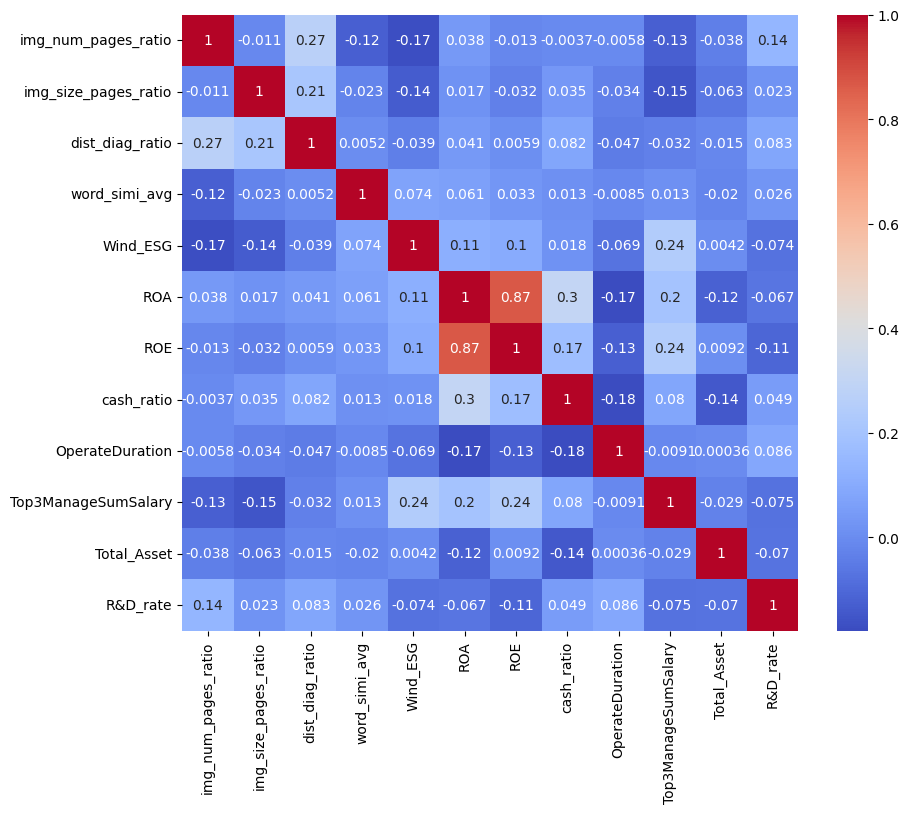

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, cmap = 'coolwarm', annot=True, square=True) 

plt.savefig("/Users/improvise/Desktop/Guaranteed Graduates/Thesis/ESG/Playground/06_DataCleaning/img/correlation heatmap2.png")

## 变量聚类分析 

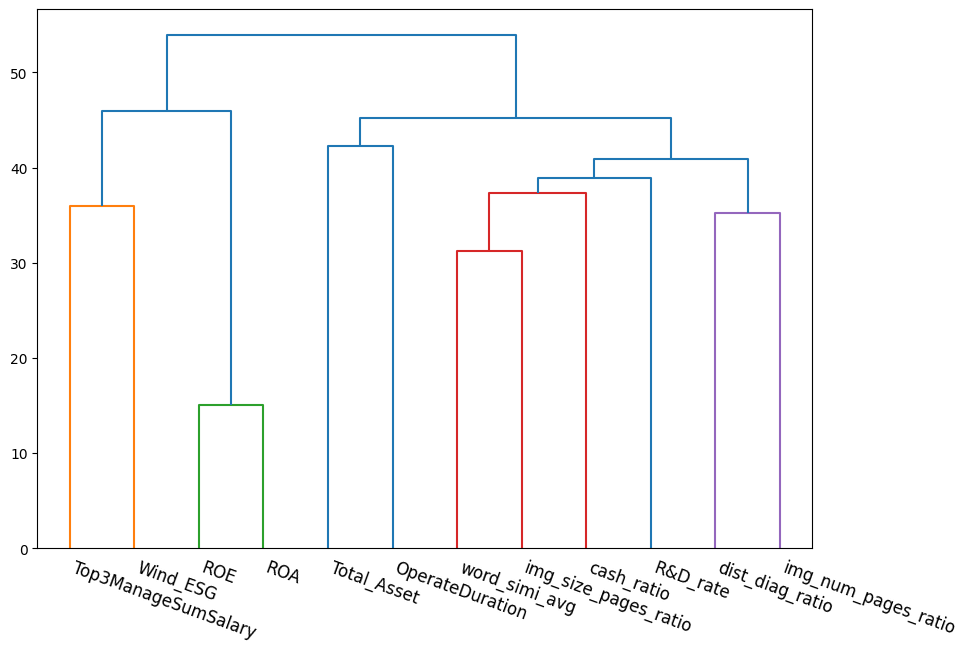

In [47]:
df_variables_Zscored_NaN = df_variables_Zscored.dropna(how='any')
linked = linkage(df_variables_Zscored_NaN.T, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df_variables_Zscored_NaN.columns, 
           distance_sort='descending', show_leaf_counts=True)
plt.xticks(rotation=-20,ha='left')  
plt.show()